In [1]:
import numpy as np
import os
from lpc.coding import *
from lpc.utils import dump_audio, get_audio, record_audio
from utils import butter_lowpass_filter, plot_audio

fs = 8000
window_len = int(240 / 8000 * fs)
window_step = int(180 / 8000 * fs)
bt_min_f, bt_max_f = 100, 400
n_coef = 10

encoder = Encoder(window_len, window_step, n_coef, bt_min_f, bt_max_f, fs)
decoder = Decoder(window_step, n_coef)

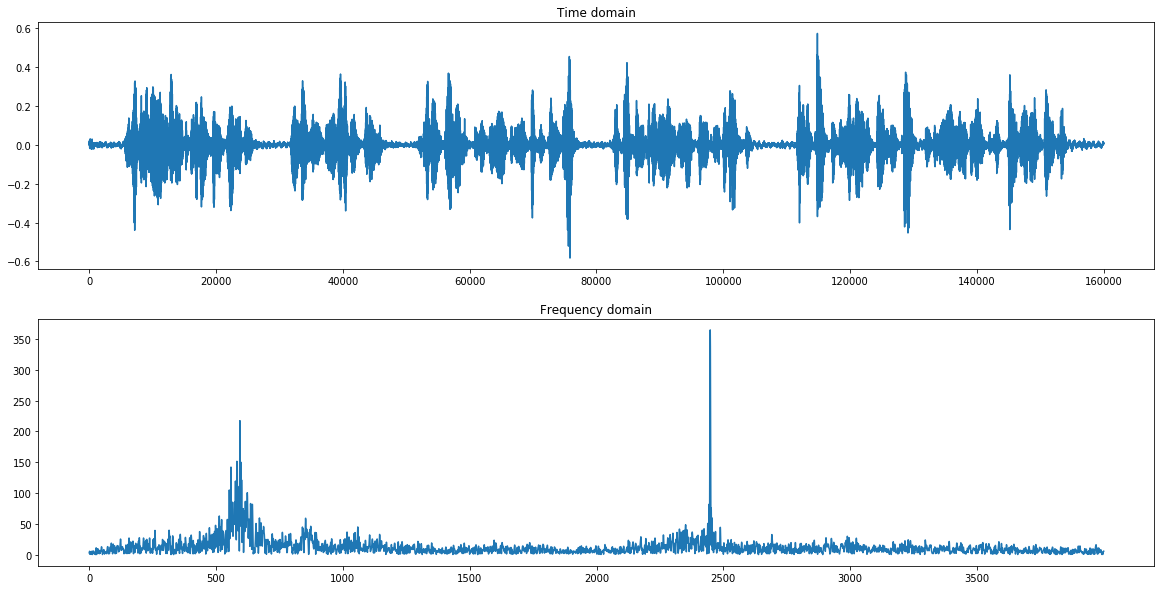

In [2]:
audio_dir = os.path.join('.', '..', 'audio')
f_min = 0
f_max = 3500

test_path = os.path.join(audio_dir, 'test.wav')
if not os.path.exists(test_path):
    audio = record_audio(20, sample_rate=fs)
    dump_audio(audio, test_path)
else:
    audio = get_audio(test_path)
    
left, right = audio[:, 0], audio[:, 1]
cutoff_freq = f_max
left_lp = butter_lowpass_filter(left, cutoff_freq, sample_rate=fs).astype(np.double)

plot_audio(left_lp)

In [3]:
enc = encoder.encode(left_lp)
dec = decoder.decode(enc)
dump_audio(dec, os.path.join(audio_dir, 'test_decomp.wav'), fs)

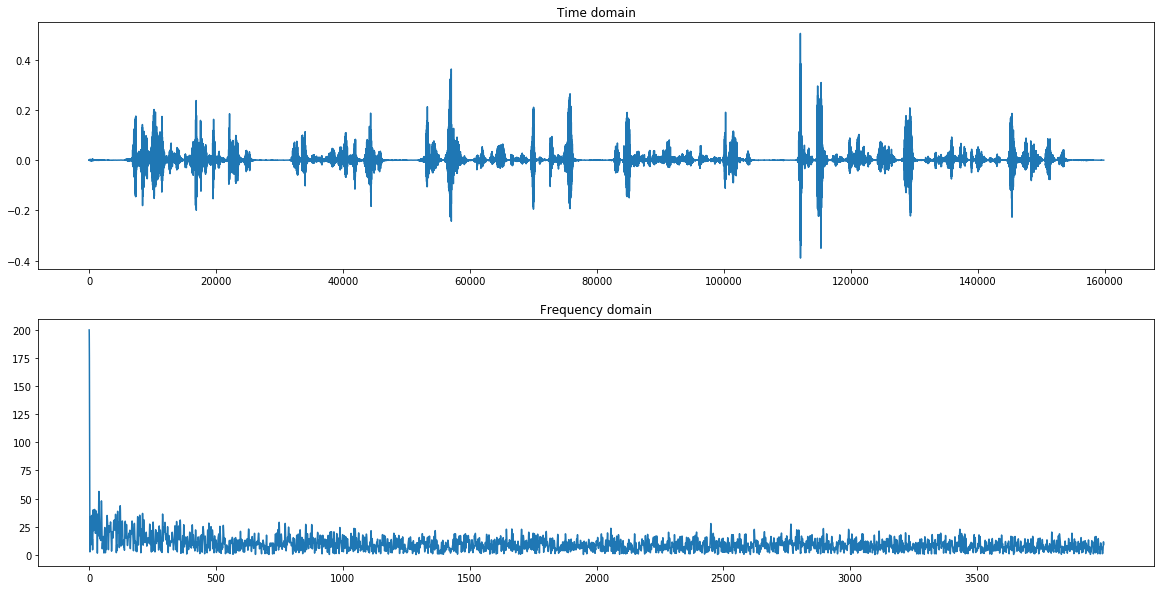

In [4]:
plot_audio(dec)

### Summary: 
Some findings (**TODO**):
  * more taps to the LP filter make for a bit better speech quality, though I would never tell that from 
    individual time windows...
  * 